In [4]:
# Import relevant modules
from rsqsim_api.catalogue.catalogue import RsqSimCatalogue
from rsqsim_api.fault.multifault import RsqSimMultiFault
import os

# Tell python where field paths etc are relative to
script_dir = os.path.abspath('')
fault_dir = "../../../data/shaw2021/rundir5091"
catalogue_dir = fault_dir

Read in fault model and catalogue.
The files are quite large and can be downloaded from https://doi.org/10.5281/zenodo.5534462

In [6]:
fault_model = RsqSimMultiFault.read_fault_file_bruce(os.path.join(script_dir, fault_dir, "zfault_Deepen.in"),
                                                     os.path.join(script_dir, fault_dir, "znames_Deepen.in"),
                                                     transform_from_utm=True)
whole_catalogue = RsqSimCatalogue.from_catalogue_file_and_lists(os.path.join(catalogue_dir, "eqs..out"),
                                                                list_file_directory=catalogue_dir, list_file_prefix="catalog")

Event of interest (note that we have only selected faults that rupture with >50 patches in this event).

Note also that `events_by_number` returns a list, and we take the first element from it.

In [7]:
event = whole_catalogue.events_by_number(1837093, fault_model, min_patches=50)[0]

Create and write animation

/home/geolvis1@canterbury.ac.nz/CAMILLA/rsqsim-python-tools/src/rsqsim_api/rsqsim_api/visualisation/utilities.py:79: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  poly_ls += list(item)
/home/geolvis1@canterbury.ac.nz/CAMILLA/rsqsim-python-tools/src/rsqsim_api/rsqsim_api/visualisation/utilities.py:79: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  poly_ls += list(item)


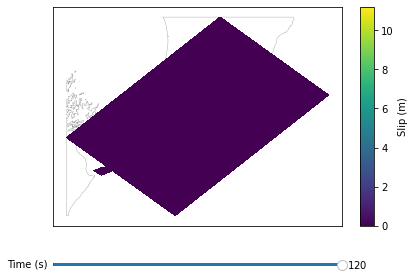

In [8]:
event.plot_slip_evolution(step_size = 2, write="slip_evolution", show=False)

Display GIF

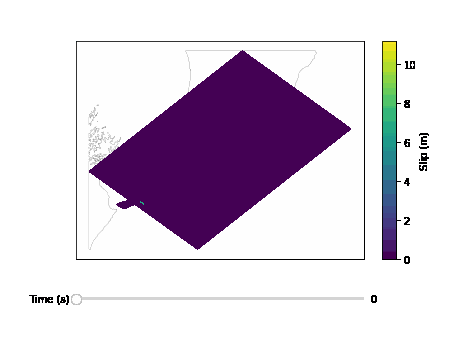

In [9]:
from IPython.display import Image
Image(open('slip_evolution.gif','rb').read())